In [80]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from ml_recon.utils import ifft_2d_img, image_slices, fft_2d_img
from torchvision.transforms.functional import center_crop
from scipy.interpolate import RegularGridInterpolator

In [81]:
# sense maps given to me by Mark
sense = np.load('/home/brenden/Documents/Coding/data/sens2.npy')

In [82]:
sense = center_crop(torch.from_numpy(sense), [200, 200])

In [83]:
vec = sense.reshape(32, -1)

In [84]:
U, s, Vh= np.linalg.svd(vec, full_matrices=False)

In [85]:
sense_10 = Vh[:10, ].reshape(10, 200, 200) * s[:10, None, None]

In [86]:
sense_10 = np.transpose(sense_10, (0, 2, 1))

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

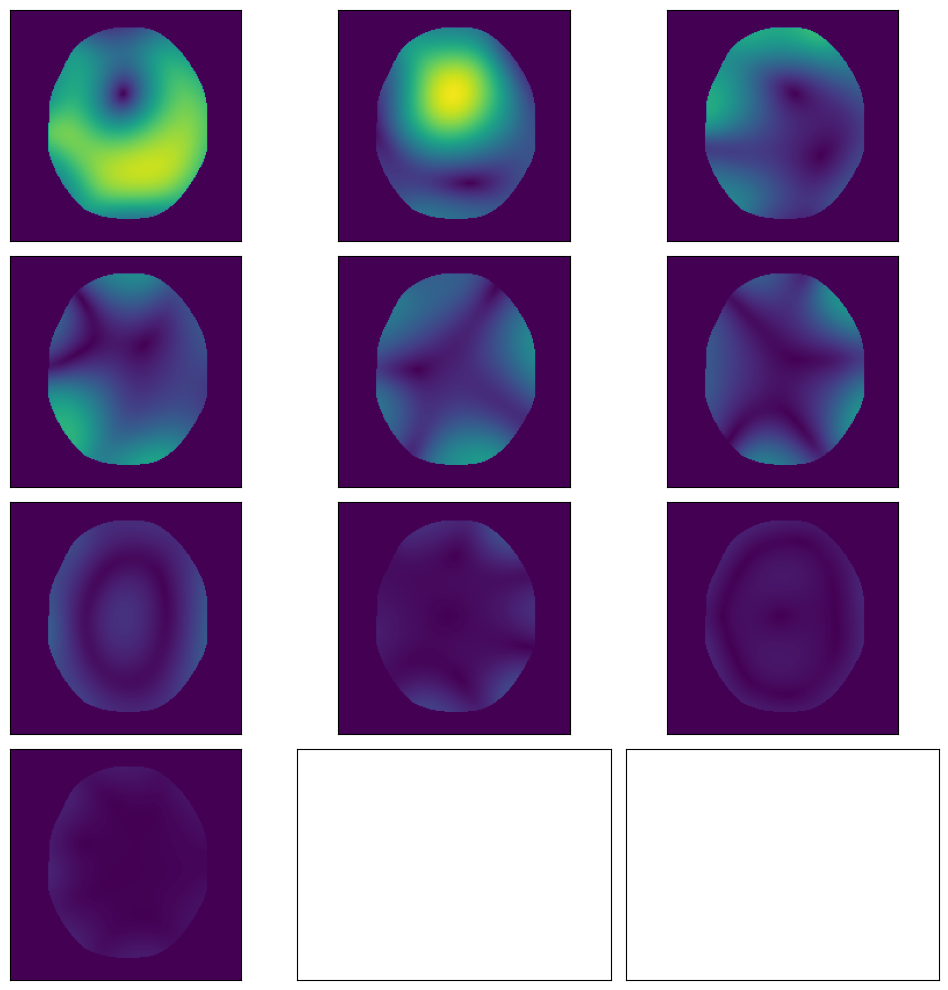

In [87]:
image_slices(np.abs(sense_10), vmax=1)

In [88]:
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)

xx, yy = np.meshgrid(x, y)

In [89]:
xx2, yy2 = np.meshgrid(np.linspace(0, 1, 256), np.linspace(0, 1, 256), indexing='ij')

In [90]:
values = np.zeros((10, 256, 256))
phase_values = np.zeros((10, 256, 256))
for i in range(10):
    abs_interporlator = RegularGridInterpolator((x, y), np.abs(sense_10[i]), method='linear',)
    values[i] = abs_interporlator((xx2, yy2))

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

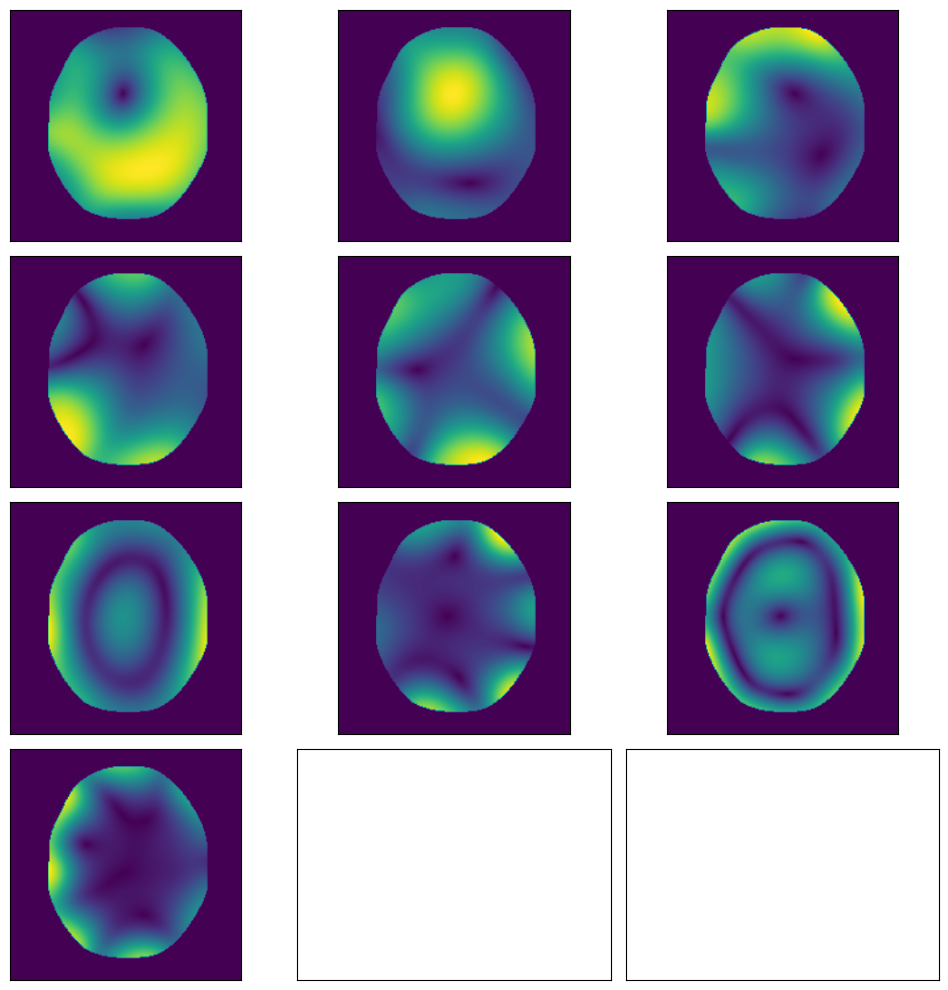

In [91]:
image_slices(values)

In [74]:
phase_coef = np.zeros(values.shape, dtype=np.complex64)
phase_coef[:, 127:130,127:130] = np.random.random((10, 3, 3)) + 1j * np.random.random((10, 3, 3))
phase_coef[:, 127:130,127:130] -= 0.5 + 0.5j

In [75]:
phase_values = np.angle(ifft_2d_img(phase_coef))

In [76]:
sense_maps = values * np.exp(1j * phase_values)

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

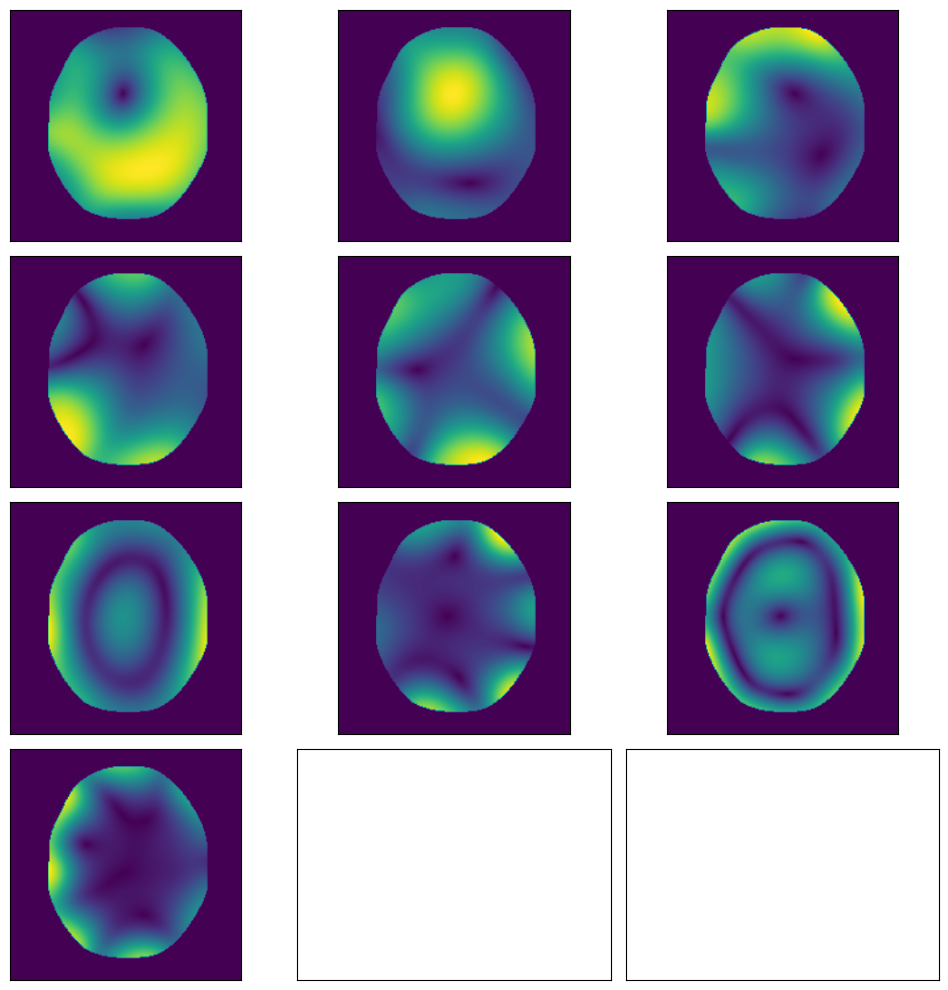

In [77]:
image_slices(np.abs(sense_maps))

(<Figure size 1000x1000 with 12 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

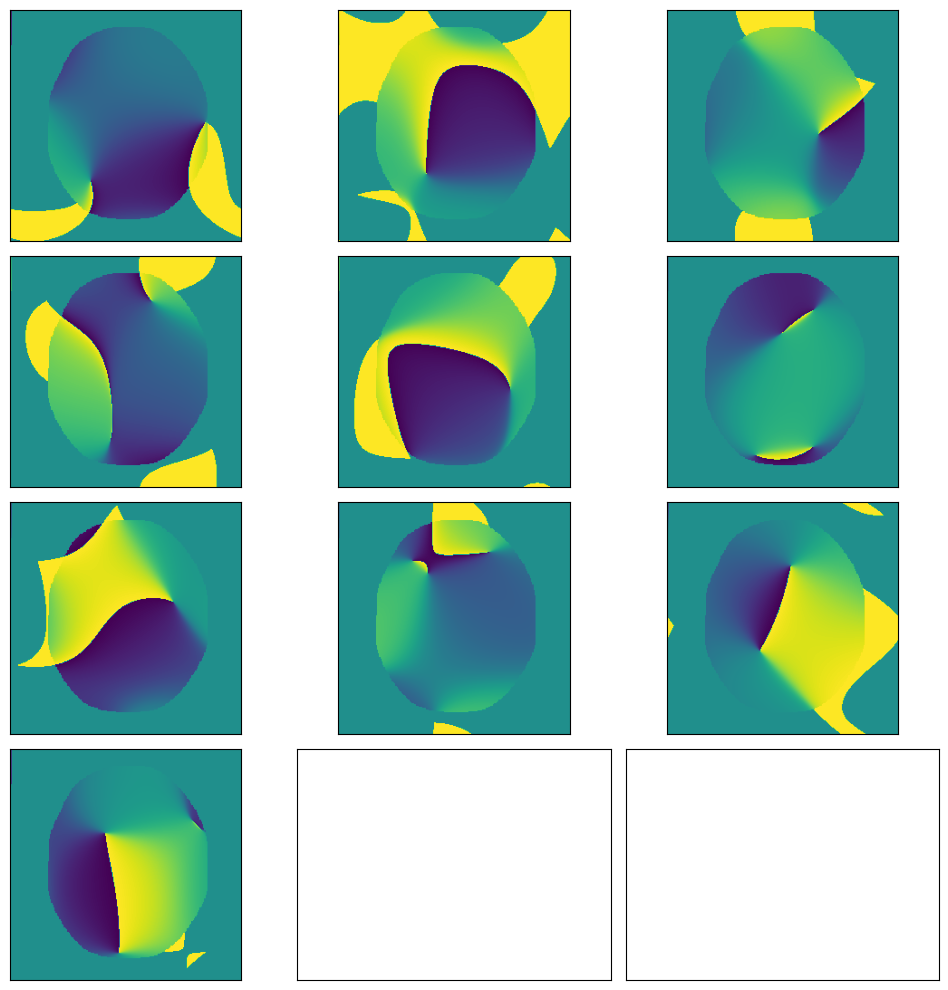

In [78]:
image_slices(np.angle(sense_maps))

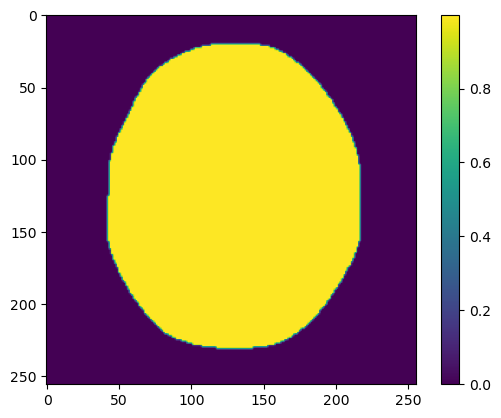

In [98]:
plt.imshow(np.sum(np.abs(sense_maps * sense_maps.conj()), axis=0))
plt.colorbar()

In [ ]:
np.save('coil_compressed_10.npy', sense_maps)